In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import json
import re
import seaborn as sns
import geopandas as gpd

%matplotlib inline

BLEACHING EVENTS

In [2]:
#Importing world wide bleaching events DF (wbe = world bleaching events)
#Initially imported bleaching events from world and regions, then filtered for world events only.. will come back to regions
wbe = pd.read_csv('coral-bleaching-events.csv')
wbe.columns = ['Entity', 'Code', 'Year', 'Moderate_bleaching', 'Severe_bleaching']
world_events = wbe[wbe['Entity'] == 'World']
world_events.head()

,Entity,Code,Year,Moderate_bleaching,Severe_bleaching
148,World,OWID_WRL,1980,5,0
149,World,OWID_WRL,1981,2,0
150,World,OWID_WRL,1982,1,0
151,World,OWID_WRL,1983,8,14
152,World,OWID_WRL,1984,1,1


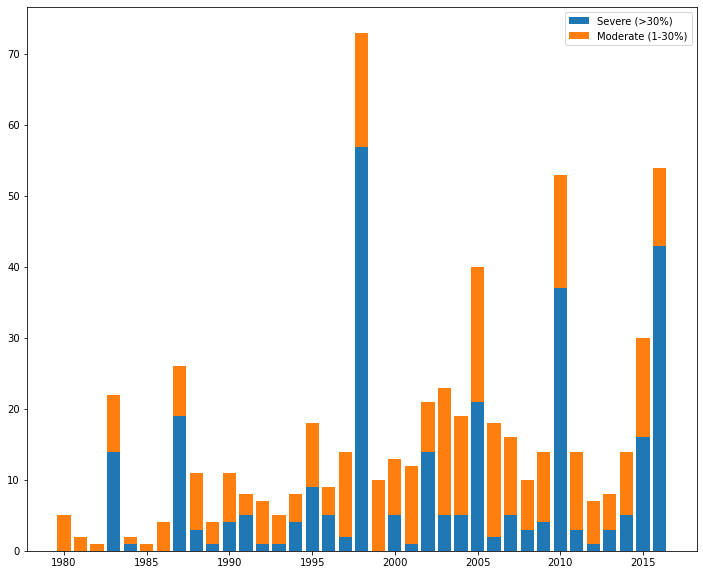

In [3]:
#Plotting severe and moderate bleaching events worldwide. 
plt.figure(figsize=(12,10))

plt.bar(world_events.Year, world_events.Severe_bleaching,
label='Severe (>30%)')
plt.bar(world_events.Year, world_events.Moderate_bleaching,
bottom=world_events.Severe_bleaching,
label='Moderate (1-30%)')

plt.legend()

In [78]:
#plotting to see info JUST ON AUSTRALASIA AND PACIFIC .. THIS DATA IS FROM 1980-2016 
ausasia = wbe[wbe['Entity'] == 'Australasia']
pacific = world_events = wbe[wbe['Entity'] == 'Pacific']
merge = pd.merge(ausasia, pacific, how='left', on='Year')
merge

,Entity_x,Code_x,Year,Moderate_bleaching_x,Severe_bleaching_x,Entity_y,Code_y,Moderate_bleaching_y,Severe_bleaching_y
0,Australasia,NaN,1980,3,0,Pacific,NaN,0,0
1,Australasia,NaN,1981,1,0,Pacific,NaN,0,0
2,Australasia,NaN,1982,0,0,Pacific,NaN,0,0
3,Australasia,NaN,1983,3,1,Pacific,NaN,1,5
4,Australasia,NaN,1984,1,0,Pacific,NaN,0,1
5,Australasia,NaN,1985,0,0,Pacific,NaN,0,0
6,Australasia,NaN,1986,2,0,Pacific,NaN,1,0
7,Australasia,NaN,1987,1,1,Pacific,NaN,0,4
8,Australasia,NaN,1988,1,1,Pacific,NaN,1,0
9,Australasia,NaN,1989,0,0,Pacific,NaN,0,0


COMPARING MODERATE BLEACHING EVENTS IN PACIFIC OCEAN TO AUSTRALASIA REGIONAL WATERS

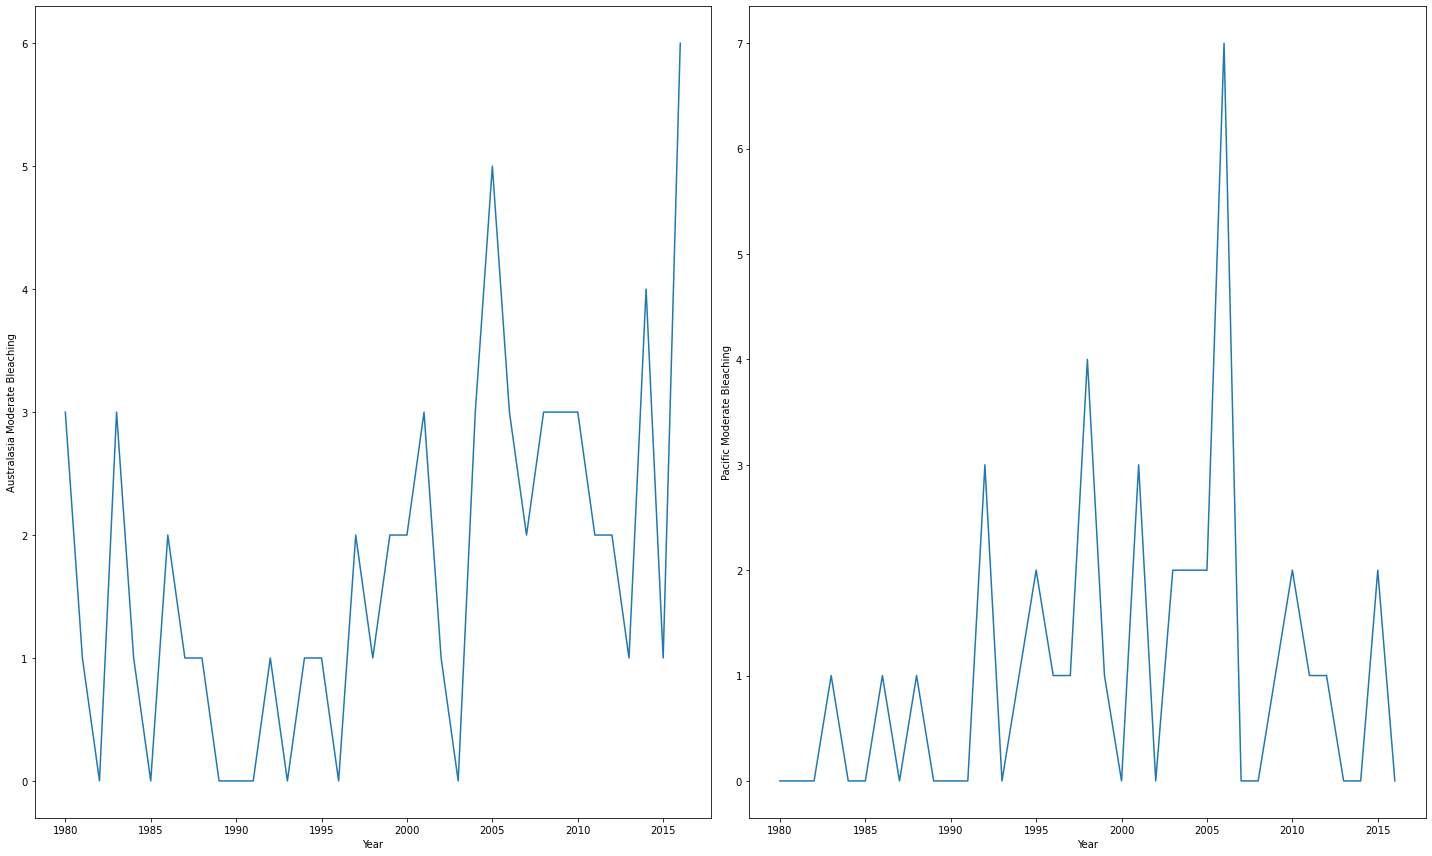

In [87]:
#figure out how to clean this up a bit .. 
plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
sns.lineplot(x='Year',y='Moderate_bleaching_x', data=merge)
plt.ylabel('Australasia Moderate Bleaching')
plt.subplot(1,2,2)
sns.lineplot(x='Year',y='Moderate_bleaching_y', data=merge)
plt.ylabel('Pacific Moderate Bleaching')
plt.tight_layout()

COMPARING SEVERE BLEACHING EVENTS IN PACIFIC OCEAN TO AUSTRALASIA REGIONAL WATERS

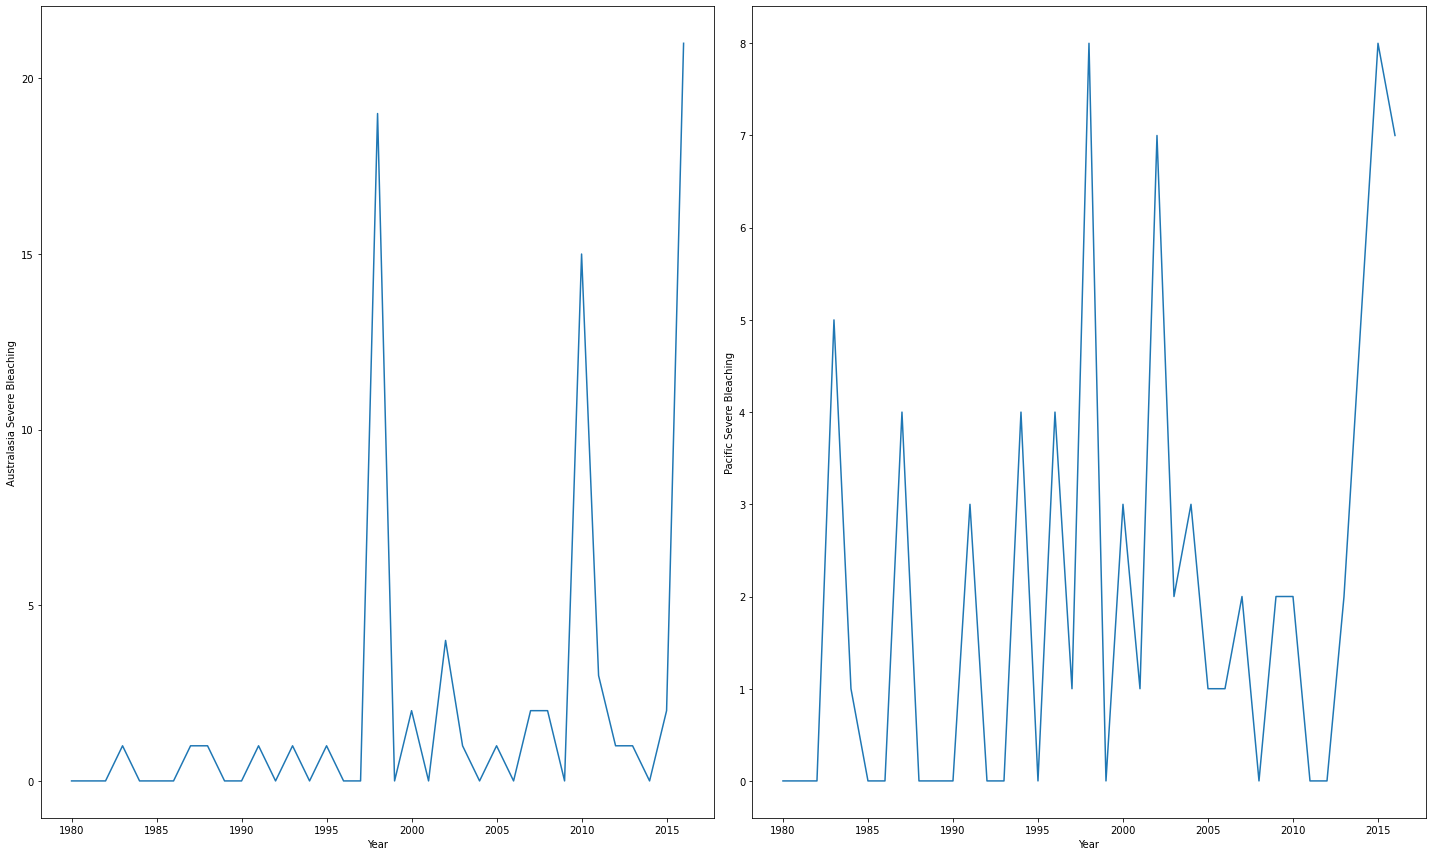

In [92]:
#figure out how to clean this up a bit.. 
plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
sns.lineplot(x='Year',y='Severe_bleaching_x', data=merge)
plt.ylabel('Australasia Severe Bleaching')
plt.subplot(1,2,2)
sns.lineplot(x='Year',y='Severe_bleaching_y', data=merge)
plt.ylabel('Pacific Severe Bleaching')
plt.tight_layout()

In [4]:
#Importing bleaching events cause by ENSO Cycle - El Nino Southern Oscillation (bee = bleaching events el nino)
bee = pd.read_csv('bleaching-events-enso.csv')
bee.head()

,Entity,Code,Year,Total bleaching events
0,El Nino,NaN,1980,0
1,El Nino,NaN,1981,0
2,El Nino,NaN,1982,1
3,El Nino,NaN,1983,22
4,El Nino,NaN,1984,0


<AxesSubplot:xlabel='Year', ylabel='Total bleaching events'>

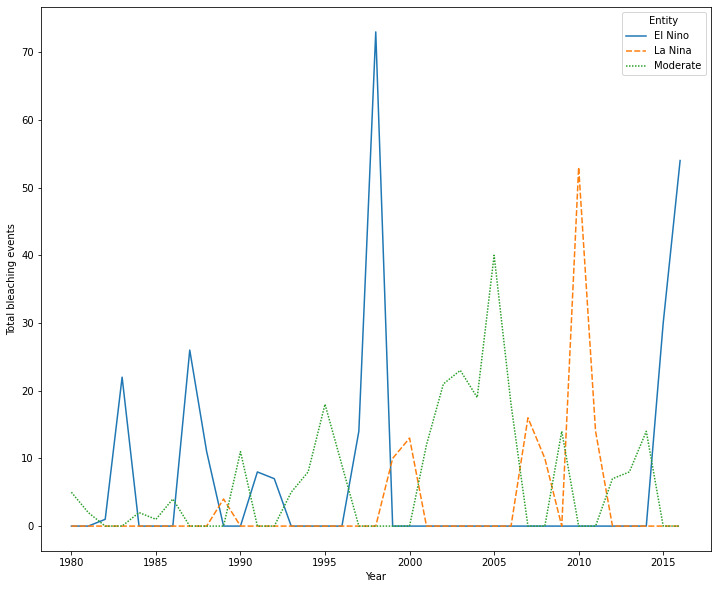

In [5]:
#plotting bleaching events caused by ENSO cycle
plt.figure(figsize=(12,10))
sns.lineplot(data=bee, x="Year", y="Total bleaching events", hue="Entity", style="Entity")

In [6]:
#Importing SEVERE bleaching events caused by ENSO cycle - (sbee = severe bleaching events el nino)
#also renamed columns to get rid of greater than sign and perc sign for cleaner object names
sbee = pd.read_csv('severe-bleaching-events-enso.csv')
sbee = sbee.rename(columns={'Severe bleaching events (>30% bleached)': 'Severe_bleaching'})
sbee.head()

,Entity,Code,Year,Severe_bleaching
0,El Nino,NaN,1980,0
1,El Nino,NaN,1981,0
2,El Nino,NaN,1982,0
3,El Nino,NaN,1983,14
4,El Nino,NaN,1984,0


<AxesSubplot:xlabel='Year', ylabel='Severe_bleaching'>

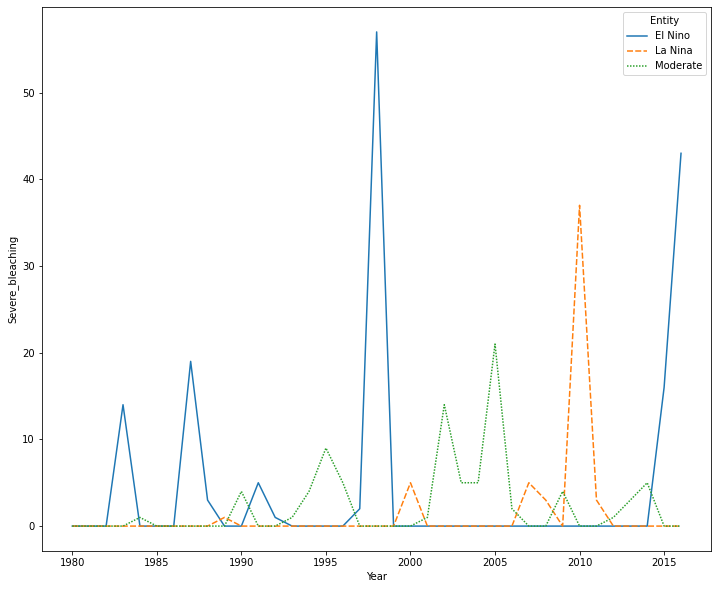

In [7]:
#plotting SEVERE bleaching events caused by ENSO cycle
plt.figure(figsize=(12,10))
sns.lineplot(data=sbee, x="Year", y="Severe_bleaching", hue="Entity", style="Entity")

GLOBAL WARMING DATA

This graph shows how the average surface temperature of the world’s oceans has changed since 1880. This graph uses the 1971 to 2000 average as a baseline for depicting change. Choosing a different baseline period would not change the shape of the data over time. The shaded band shows the range of uncertainty in the data, based on the number of measurements collected and the precision of the methods used.

In [166]:
#Importing sea surface temp data .. reference is USEPA
sea_surf_temp = pd.read_csv('sea-surface-temp.csv')
sea_surf_temp.columns = ['year', 'annual_anomaly', 'lower_95_perc_confidence_interval', 'upper_95_perc_confidence_level']
sea_surf_temp.head()

,year,annual_anomaly,lower_95_perc_confidence_interval,upper_95_perc_confidence_level
0,1880,-0.211848,-0.420,-0.628152
1,1881,-0.128904,-0.330,-0.531096
2,1882,-0.150432,-0.348,-0.545568
3,1883,-0.261960,-0.456,-0.650040
4,1884,-0.373848,-0.582,-0.790152


<AxesSubplot:xlabel='year'>

<Figure size 864x720 with 0 Axes>

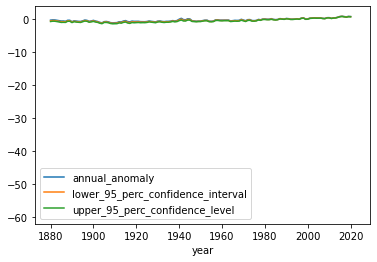

In [167]:
#plotting sea surface temperature across years
#come back to this to figure out why y axis isn't cooperating as it was before
plt.figure(figsize=(12,10))
sea_surf_temp.plot(x='year', y =['annual_anomaly', 'lower_95_perc_confidence_interval', 'upper_95_perc_confidence_level'])

In [10]:
#Importing Ocean Heat DF. Different agencies results, US, JAPAN, AUSTRALIA, CHINA
ocean_heat = pd.read_csv('ocean-heat.csv')
ocean_heat.head()

,Year,CSIRO,IAP,MRI/JMA,NOAA
0,1955,NaN,-7.567433,-9.497333,-3.437233
1,1956,NaN,-6.933433,-7.897333,-2.844233
2,1957,NaN,-6.810433,-8.947333,-4.849233
3,1958,NaN,-2.275433,-5.707333,-1.769233
4,1959,NaN,-5.154433,-7.347333,-2.425233


<AxesSubplot:xlabel='Year'>

<Figure size 864x720 with 0 Axes>

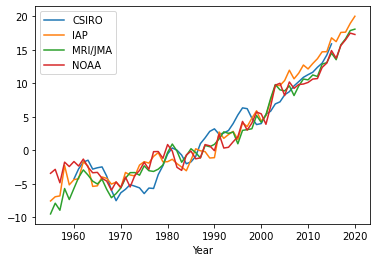

In [95]:
#plotting ocean heat recorded by main instututions .. China, Japan, Australia, USA.
plt.figure(figsize=(12,10))
ocean_heat.plot(x='Year', y =['CSIRO', 'IAP', 'MRI/JMA', 'NOAA'])

In [108]:
#Importing Ocean acidity .. need to filter info for only pacific ocean as it's the only relevant info here.. 
sea_acid = pd.read_csv('ocean-acidity.csv', nrows=299)
sea_acid = sea_acid.rename(columns={'Hawaii Year': 'hawaii_year', 'Hawaii pH': 'hawaii_ph', 'Hawaii pCO2' : 'hawaii_pco2'})
sea_acid.head()

,hawaii_year,hawaii_ph,hawaii_pco2,Unnamed: 3,Canary Islands Year,Canary Islands pH,Canary Islands pCO2,Unnamed: 7,Bermuda Year,Bermuda pH,Bermuda pCO2,Unnamed: 11,Cariaco Year (pH),Cariaco pH,Cariaco Year (pCO2),Cariaco pCO2
0,1989,8.1097,330.9,NaN,1995.7507,8.0765,377.6526,NaN,1983.6959,8.070,363.187,NaN,1995.950685,8.0597,1995.950685,400.925986
1,1989,8.1092,330.6,NaN,1995.7562,8.0743,380.0385,NaN,1983.7726,8.088,343.941,NaN,1996.032787,8.0603,1996.032787,388.131890
2,1989,8.1168,324.3,NaN,1995.7644,8.0713,383.1138,NaN,1984.0712,8.146,299.199,NaN,1996.120219,8.0690,1996.120219,375.392151
3,1989,8.1316,310.9,NaN,1995.9014,8.0837,370.4347,NaN,1984.1836,8.145,301.419,NaN,1996.292350,7.9921,1996.292350,443.365629
4,1989,8.1218,317.7,NaN,1996.0656,8.1117,343.0605,NaN,1984.3260,8.144,302.309,NaN,1996.355191,8.0482,1996.355191,381.591860


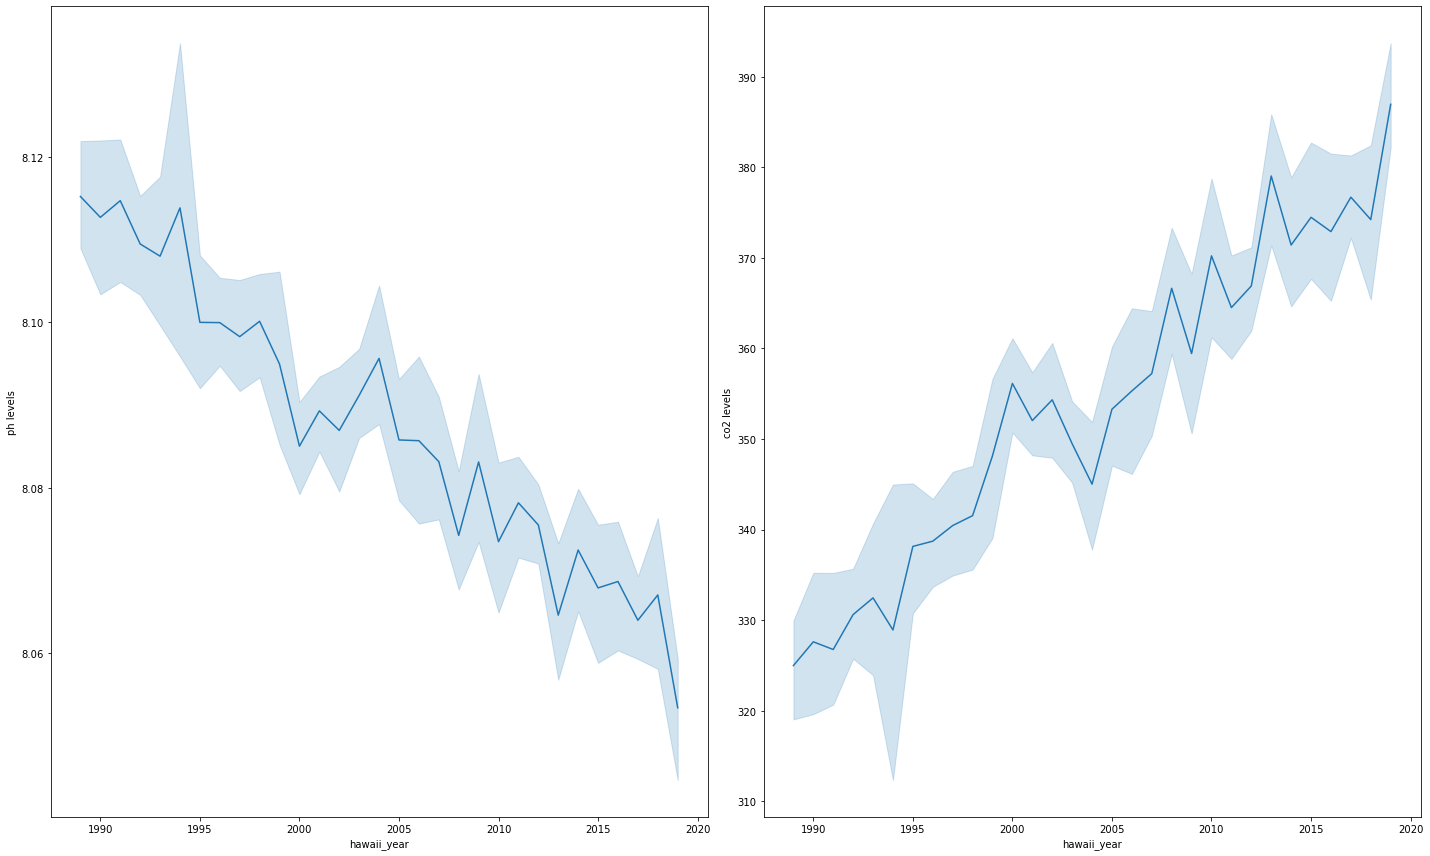

In [114]:
#plotting HAWAII INFO SINCE RELEVANT TO PACIFIC OCEAN
#ph levels on the decline, ever so slightly .. why?
#co2 levels on the rise due to carbon emissions
plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
sns.lineplot(x='hawaii_year',y='hawaii_ph', data=sea_acid)
plt.ylabel('ph levels')
plt.subplot(1,2,2)
sns.lineplot(x='hawaii_year',y='hawaii_pco2', data=sea_acid)
plt.ylabel('co2 levels')
plt.tight_layout()

WILDLIFE/ECOSYSTEMS/EXTENCTION THREAT

In [155]:
#total number of DESCRIBED SPECIES, really only using to show how relevant coral is among other living things
species_tot = pd.read_csv('number-of-described-species.csv')
species_tot= species_tot.rename(columns={'Number of described species': 'species_count'})
species_filt = species_tot[species_tot['species_count'] < 12000]
species_filt = species_filt.sort_values('species_count')
species_filt

,Entity,Code,Year,species_count
13,Horseshoe Crabs,NaN,2020,4
25,Velvet Worms,NaN,2020,183
12,Gymnosperms,NaN,2020,1113
5,Corals,NaN,2020,2175
4,Brown Algae,NaN,2020,4326
17,Mammals,NaN,2020,6485
23,Red Algae,NaN,2020,7331
1,Amphibians,NaN,2020,8250
3,Birds,NaN,2020,11158
24,Reptiles,NaN,2020,11341


<BarContainer object of 12 artists>

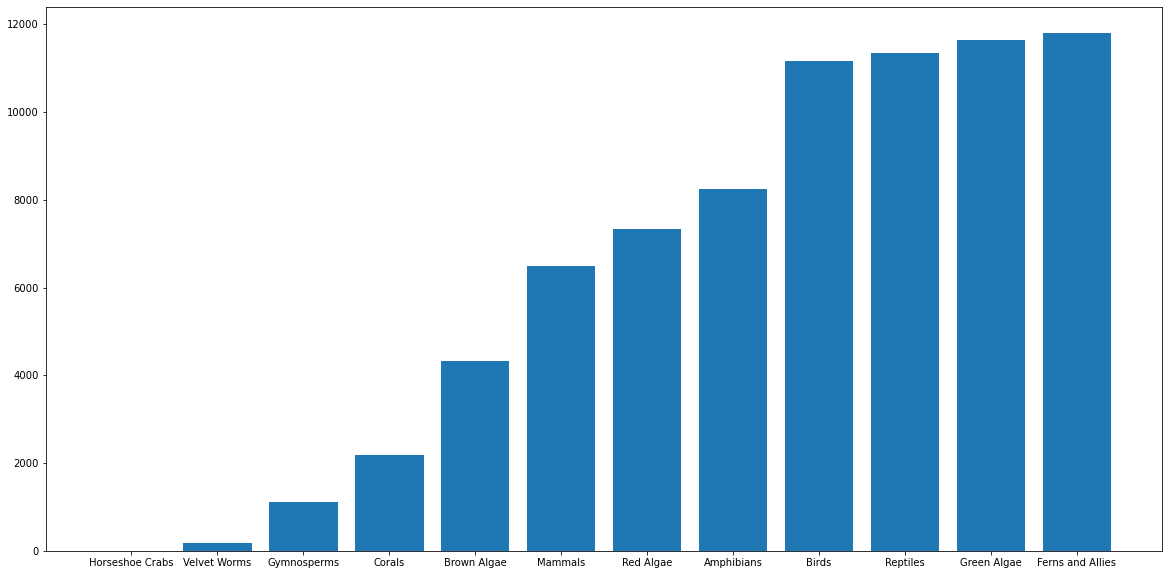

In [199]:
#plotting number of species less than 12,000 total just to give a relevant picture of corals to mammals and birds etc. 
plt.figure(figsize=(20,10))
plt.bar(species_filt.Entity, species_filt.species_count)

In [229]:
#total number of THREATENED SPECIES. explain why they are threated.. look into this further on OUR WORLD.
species_threat = pd.read_csv('number-species-threatened.csv')
species_threat = species_threat.rename(columns={'Number of threatened species': 'species_threatened'})
#filtering for smaller numbers of relevant threatened species closer to coral for cleaner plotting
threat_filt = species_threat[species_threat['species_threatened'] >= 148]
threat_relevant = threat_filt[threat_filt['species_threatened'] <= 742]
threat_relevant

,Entity,Code,Year,species_threatened
6,Other Invertebrates,NaN,2020,148
7,Mosses,NaN,2020,165
8,Mushrooms etc.,NaN,2020,185
9,Arachnids,NaN,2020,203
10,Corals,NaN,2020,237
11,Fungi and Protists,NaN,2020,239
12,Ferns and Allies,NaN,2020,265
13,Gymnosperms,NaN,2020,403
14,Crustaceans,NaN,2020,742


<BarContainer object of 9 artists>

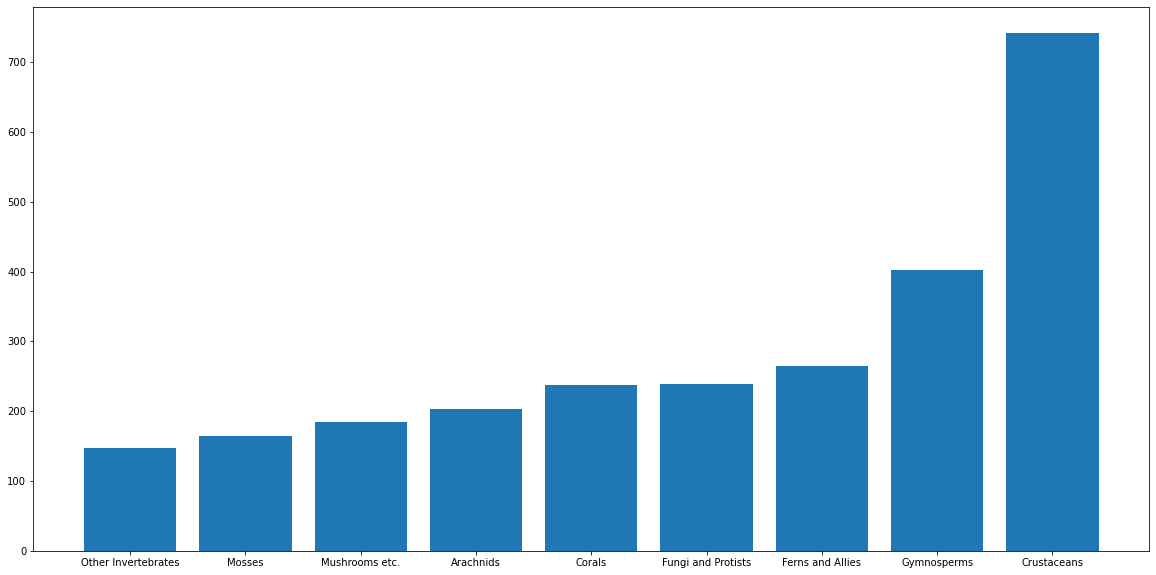

In [230]:
#plotting THREATENED SPECIES CLOSER TO THE TOTAL NUMBER OF CORAL SPECIES THREATENED
plt.figure(figsize=(20,10))
plt.bar(threat_relevant.Entity, threat_relevant.species_threatened)

In [231]:
#total number of FISH THREATENED 
fish_threat = pd.read_csv('fish-species-threatened.csv')
fish_threat = fish_threat.rename(columns={'Fish species, threatened': 'fish_threatened'})
fish_threat.head()

,Entity,Code,Year,fish_threatened
0,Afghanistan,AFG,2017,5
1,Albania,ALB,2017,44
2,Algeria,DZA,2017,40
3,American Samoa,ASM,2017,12
4,Andorra,AND,2017,0


In [248]:
#filtering for top 10 fish species threatened by country in 2017
fish_filt = fish_threat[fish_threat['fish_threatened'] >= 107]
fish_threat_top10 = fish_filt[fish_filt['fish_threatened'] <= 181]
fish_threat_top10 = fish_threat_top10.sort_values('fish_threatened', ascending=False)
fish_threat_top10

,Entity,Code,Year,fish_threatened
151,Mexico,MEX,2017,181
234,Tanzania,TZA,2017,176
109,Indonesia,IDN,2017,163
43,China,CHN,2017,134
241,Turkey,TUR,2017,131
11,Australia,AUS,2017,123
34,Cameroon,CMR,2017,121
218,South Africa,ZAF,2017,120
142,Madagascar,MDG,2017,110
235,Thailand,THA,2017,107


<BarContainer object of 10 artists>

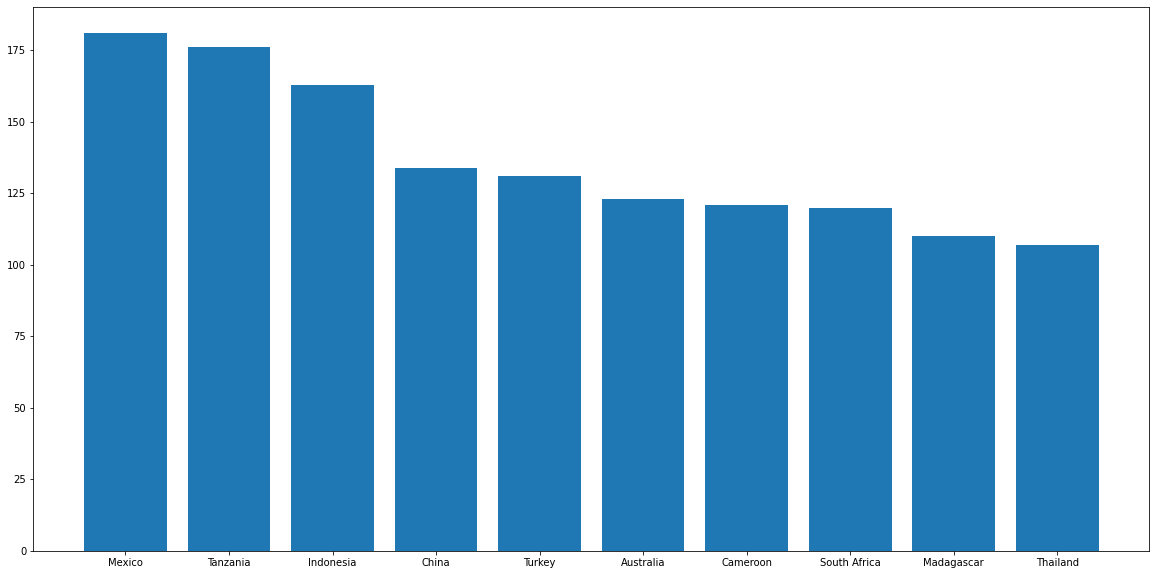

In [249]:
#plotting threatened top 10 threatened fish species by country
plt.figure(figsize=(20,10))
plt.bar(fish_threat_top10.Entity, fish_threat_top10.fish_threatened)

POLLUTION

In [276]:
#importing GLOBAL CARBON BUDGET DF, per country .. try filtering specific years here to clean up a little bit
#years ranging are way too massive, find a range that coincides with other DF's to tell a story.
gcb = pd.read_csv('GCB2020v18_MtCO2_flat.csv')
gcb = gcb[['Country', 'Year', 'Total', 'Coal', 'Oil', 'Gas', 'Per Capita']]
gcb_filt = gcb[gcb['Year'] == 2017]
gcb_filt

,Country,Year,Total,Coal,Oil,Gas,Per Capita
267,Afghanistan,2017,6.859825,3.447824,3.066768,0.300448,0.188996
537,Albania,2017,5.404400,0.439680,4.100016,0.084272,1.873815
807,Algeria,2017,153.448361,0.795088,55.374032,82.352064,3.707450
1077,Andorra,2017,0.465328,0.000000,0.465328,0.000000,6.043142
1347,Angola,2017,37.470836,0.000000,20.126352,1.571856,1.256704
...,...,...,...,...,...,...,...
59937,Wallis and Futuna Islands,2017,0.025648,0.000000,0.025648,0.000000,2.155294
60207,Yemen,2017,10.107076,0.337088,7.749360,1.183472,0.363109
60477,Zambia,2017,6.519623,1.901616,3.572400,0.000000,0.386839
60747,Zimbabwe,2017,10.246841,6.382688,3.282944,0.000000,0.719754


<BarContainer object of 226 artists>

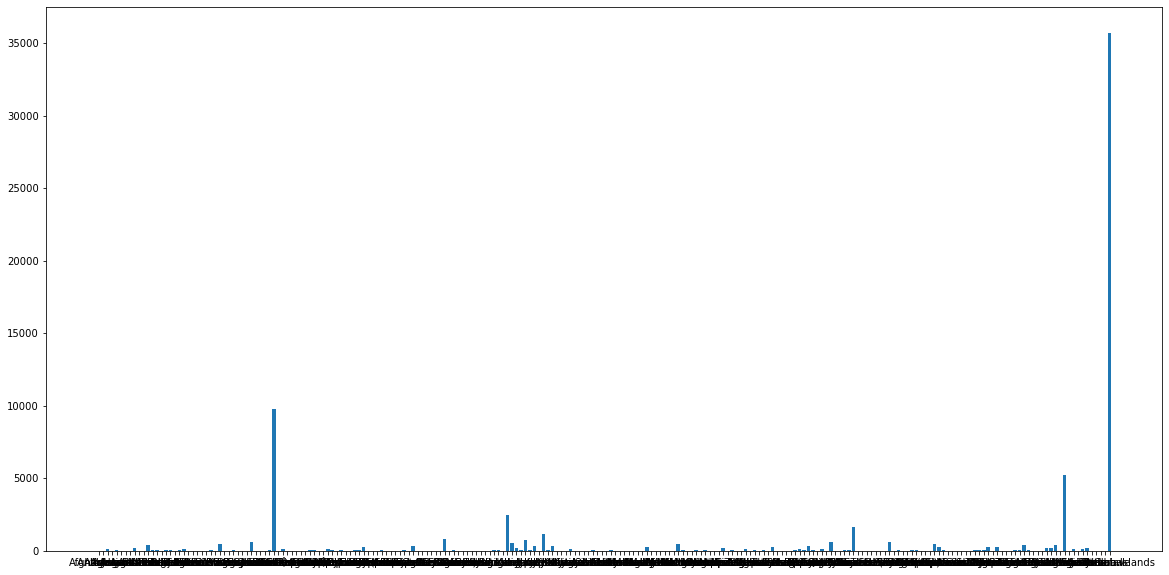

In [257]:
plt.figure(figsize=(20,10))
plt.bar(gcb_filt.Country, gcb_filt.Total)

In [16]:
#importing global plastics PRODUCTION
plastics = pd.read_csv('global-plastics-production.csv')
plastics.head()

,Entity,Code,Year,Global plastics production (million tonnes)
0,World,OWID_WRL,1950,2000000
1,World,OWID_WRL,1951,2000000
2,World,OWID_WRL,1952,2000000
3,World,OWID_WRL,1953,3000000
4,World,OWID_WRL,1954,3000000


In [17]:
#attempting to add geojson for global carbon budget.
